In [6]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.optimizers import Adam

from dataloader import get_data_generators
from model_build import build_resnet50

In [3]:
img_size = (224, 224)
batch_size = 8
data_dir = 'Dataset'
model_path = 'model.h5'

# Load test data
_, _, test_gen = get_data_generators(
    data_dir=data_dir,
    img_size=img_size,
    batch_size=batch_size)

Found 140002 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.
Found 10905 images belonging to 2 classes.


In [7]:
model, base_model = build_resnet50(input_shape=img_size + (3,))
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.load_weights(model_path)

In [8]:
y_prob = model.predict(test_gen)
y_pred = (y_prob > 0.6).astype(int).flatten()
y_true = test_gen.classes


1364/1364 [==============================] - 57s 40ms/step


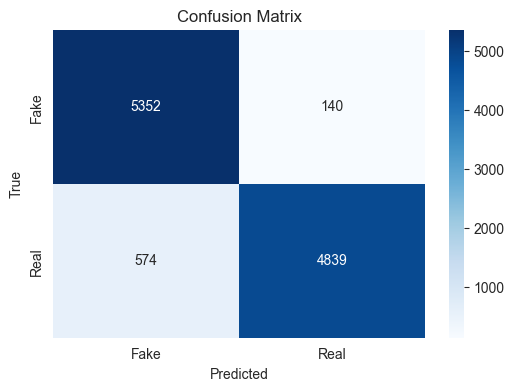

In [9]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=test_gen.class_indices,
            yticklabels=test_gen.class_indices)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [10]:
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_gen.class_indices.keys()))

Classification Report:
              precision    recall  f1-score   support

        Fake       0.90      0.97      0.94      5492
        Real       0.97      0.89      0.93      5413

    accuracy                           0.93     10905
   macro avg       0.94      0.93      0.93     10905
weighted avg       0.94      0.93      0.93     10905



In [11]:
acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.9345
